In this notebook I perform a detailed advertising performance analysis using a dataset containing clicks, leads, orders, spending, and revenue I calculate key metrics such as CPC (Cost per Click), CPL (Cost per Lead), CAC (Customer Acquisition Cost), AOV (Average Order Value), Profit, ROMI (Return on Marketing Investment), CTR (Click-Through Rate), and conversion rates this analysis helps make informed decisions about ad budget allocation and optimization.

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [6]:
df = pd.read_csv('/kaggle/input/analyze-the-marketing-spending/Marketing.csv')
df.head()

,id,c_date,campaign_name,category,campaign_id,impressions,mark_spent,clicks,leads,orders,revenue
0,1,2021-02-01,facebook_tier1,social,349043,148263,7307.37,1210,13,1,4981.0
1,2,2021-02-01,facebOOK_tier2,social,348934,220688,16300.20,1640,48,3,14962.0
2,3,2021-02-01,google_hot,search,89459845,22850,5221.60,457,9,1,7981.0
3,4,2021-02-01,google_wide,search,127823,147038,6037.00,1196,24,1,2114.0
4,5,2021-02-01,youtube_blogger,influencer,10934,225800,29962.20,2258,49,10,84490.0


# KPIs  Create marketing metrics

i calculte this metrics 
Return on marketing investment (ROMI)
Cost per click (CPC)
Cost per lead (CPL)
Customer acquisition cost (CAC)
Average order value (AOV)
Conversion rate 1
Conversion rate 2

In [43]:

# Avoid division by zero
def safe_div(a, b):
    return np.where(b == 0, 0, a / b)
category_metrics = df.groupby("category").agg({
    "clicks": "sum",
    "leads": "sum",
    "orders": "sum",
    "mark_spent": "sum",
    "revenue": "sum"
}).reset_index()

category_metrics["CPC"] = safe_div(category_metrics["mark_spent"], category_metrics["clicks"])   # Cost per Click
category_metrics["CPL"] = safe_div(category_metrics["mark_spent"], category_metrics["leads"])    # Cost per Lead
category_metrics["CAC"] = safe_div(category_metrics["mark_spent"], category_metrics["orders"])   # Cost per Order / CAC
category_metrics["AOV"] = safe_div(category_metrics["revenue"], category_metrics["orders"])      # Average Order Value
df["Profit"] = df["revenue"] - df["mark_spent"]
df["ROMI"] = safe_div(df["Profit"], df["mark_spent"])
df["CTR"] = safe_div(df["clicks"], df["impressions"]) 
df["Conversion_1"] = safe_div(df["leads"], df["clicks"])
df["Conversion_2"] = safe_div(df["orders"], df["leads"])


**Return on marketing investment (ROMI)**

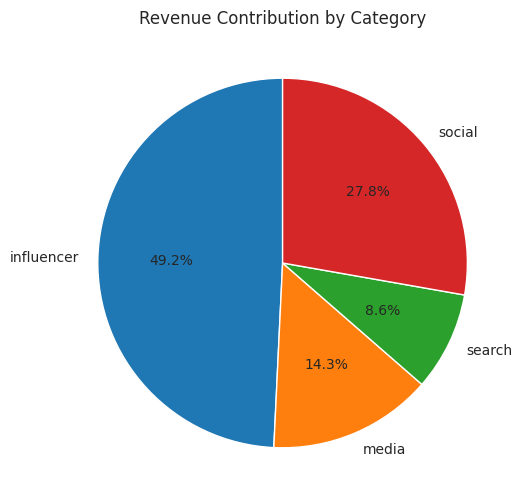

In [44]:
plt.figure(figsize=(6,6))
plt.pie(
    category_metrics["revenue"],
    labels=category_metrics["category"],
    autopct="%.1f%%",
    startangle=90
)
plt.title("Revenue Contribution by Category")
plt.show()


**Cost per click (CPC)**

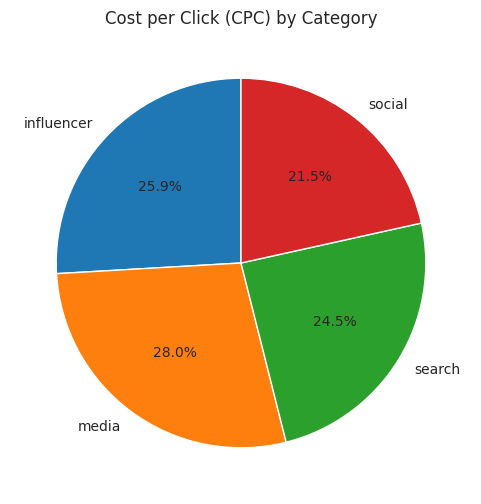

In [40]:
plt.figure(figsize=(6,6))
plt.pie(
    category_metrics["CPC"],
    labels=category_metrics["category"],
    autopct="%.1f%%",
    startangle=90
)
plt.title("Cost per Click (CPC) by Category")
plt.show()





**Cost per lead (CPL)**

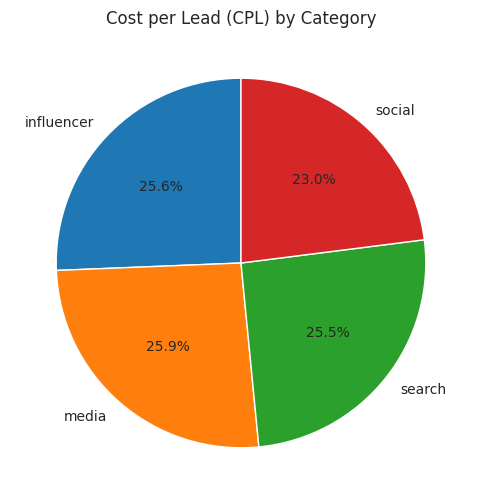

In [38]:
plt.figure(figsize=(6,6))
plt.pie(
    category_metrics["CPL"],
    labels=category_metrics["category"],
    autopct="%.1f%%",
    startangle=90
)
plt.title("Cost per Lead (CPL) by Category")
plt.show()

**Customer acquisition cost (CAC)**

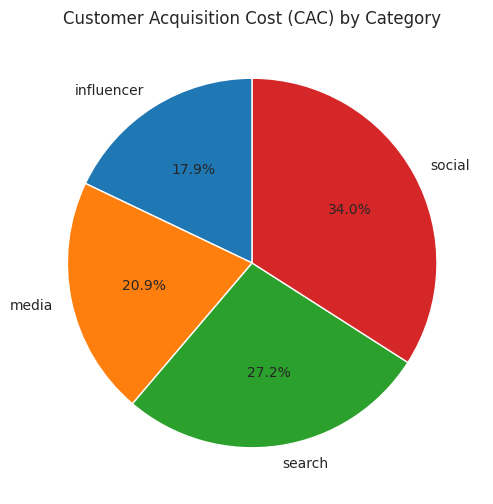

In [39]:
plt.figure(figsize=(6,6))
plt.pie(
    category_metrics["CAC"],
    labels=category_metrics["category"],
    autopct="%.1f%%",
    startangle=90
)
plt.title("Customer Acquisition Cost (CAC) by Category")
plt.show()

**Average order value (AOV)**

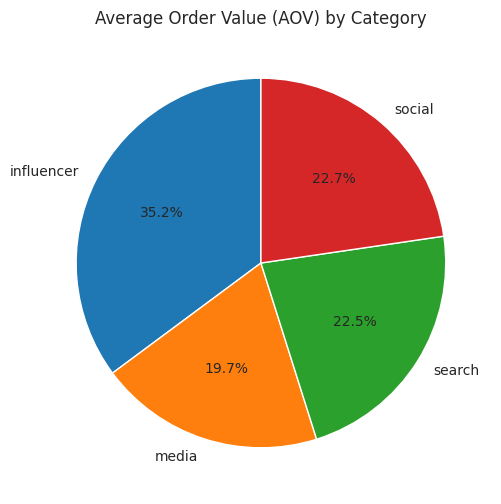

In [41]:
plt.figure(figsize=(6,6))
plt.pie(
    category_metrics["AOV"],
    labels=category_metrics["category"],
    autopct="%.1f%%",
    startangle=90
)
plt.title("Average Order Value (AOV) by Category")
plt.show()

**Conversion Rate 1 (Click Conversion Rate)**

In [10]:
cr1 = (df["clicks"].sum() / df["impressions"].sum()) * 100
print("Overall Conversion Rate :", cr1)

Overall Conversion Rate : 0.19014238511802986


In [14]:
import datetime
df['c_date'] = pd.to_datetime(df["c_date"])
df['c_day'] = df['c_date'].dt.day

In [15]:
!pip install plottable

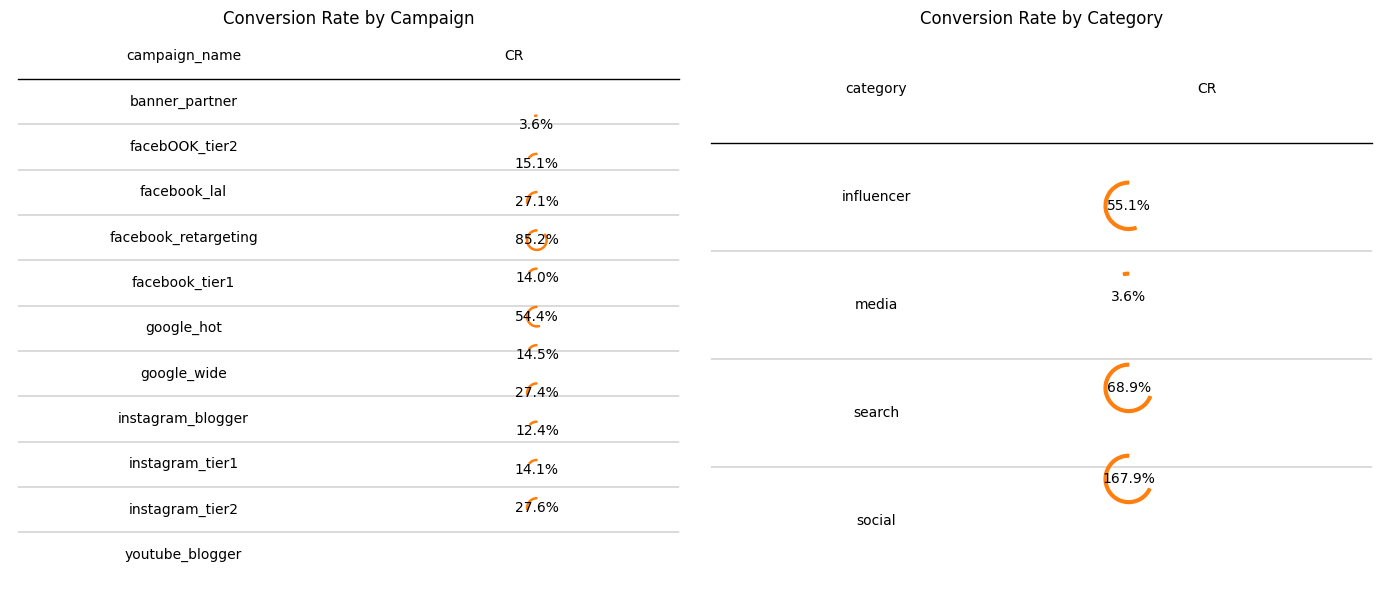

In [26]:
from plottable import Table, ColumnDefinition
from plottable.plots import progress_donut
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# CR by Campaign
Table(
    cr_table1,
    ax=axes[0],
    textprops={"ha": "center"},
    column_definitions=[
        ColumnDefinition(
            "CR1",
            title="CR",
            plot_fn=progress_donut,
            plot_kw={"is_pct": True, "formatter": "{:.1%}"}
        )
    ],
)
axes[0].set_title("Conversion Rate by Campaign")

# CR by Category
Table(
    cr_table2,
    ax=axes[1],
    textprops={"ha": "center"},
    column_definitions=[
        ColumnDefinition(
            "CR1",
            title="CR",
            plot_fn=progress_donut,
            plot_kw={"is_pct": True, "formatter": "{:.1%}"}
        )
    ],
)
axes[1].set_title("Conversion Rate by Category")

plt.tight_layout()
plt.show()


**Conversion Rate 2 (Lead/Order Conversion Rate)**

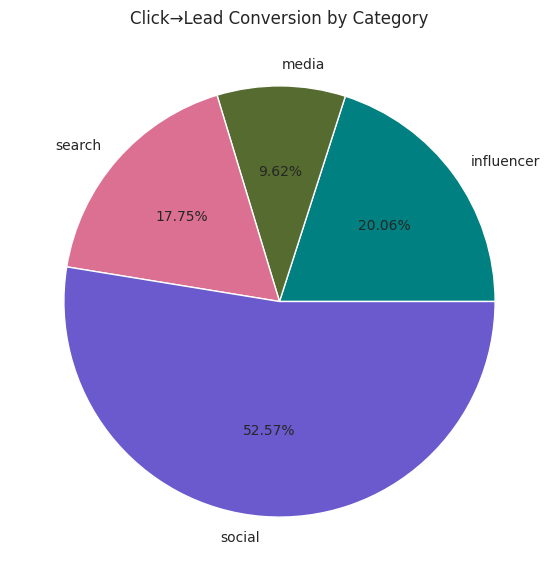

In [20]:

# Calculate Click → Lead conversion
df["CR2_click"] = df["leads"] / df["clicks"]

# Aggregate by category
cr2_click_table2 = df.groupby('category')[["CR2_click"]].sum()

# Pie chart
colors = ['teal', 'darkolivegreen', 'palevioletred', 'slateblue']
plt.figure(figsize=(7,7))
plt.pie(
    x=cr2_click_table2["CR2_click"], 
    labels=cr2_click_table2.index, 
    autopct="%.2f%%", 
    colors=colors
)
plt.title("Click→Lead Conversion by Category")
plt.show()

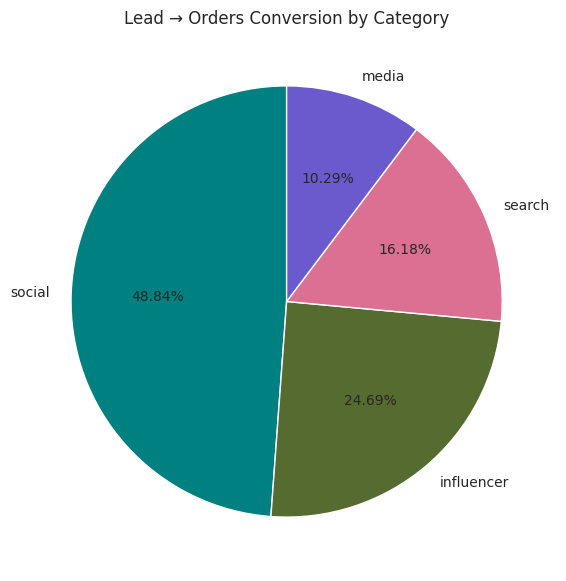

In [23]:
df["CR2_leads"] = df["orders"] / df["leads"].replace(0, 1)  # avoid division by zero

# Sum by category for pie chart
cr2_lead_by_cat = df.groupby("category")[["CR2_leads"]].sum().sort_values(by="CR2_leads", ascending=False)

# Colors for pie slices
colors = ['teal', 'darkolivegreen', 'palevioletred', 'slateblue']

# Plot pie chart
plt.figure(figsize=(7,7))
plt.pie(
    x=cr2_lead_by_cat["CR2_leads"], 
    labels=cr2_lead_by_cat.index, 
    autopct="%.2f%%", 
    colors=colors,
    startangle=90
)
plt.title("Lead → Orders Conversion by Category")
plt.show()

# ROMI by campaigns

<Axes: xlabel='romi', ylabel='campaign_name'>

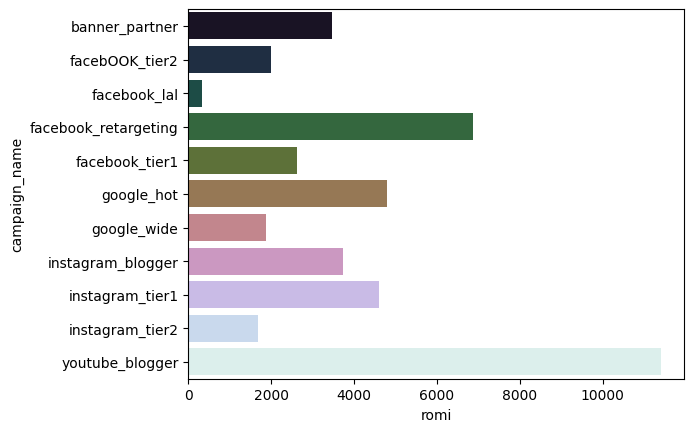

In [19]:
df['romi'] = (df['revenue']/df['mark_spent']) * 100
romi_by_camp = df.groupby('campaign_name')['romi'].sum().reset_index()
sns.barplot(y=romi_by_camp['campaign_name'], x=romi_by_camp['romi'],palette='cubehelix')

* here The facebook_retargeting and  youtube_blogger campaign clearly outperforms all others, achieving a substantially higher ROMI
 this indicates strong audience targeting high user intent 
 
* Campaigns such as  facebook lal and banner_partner show low or weak ROMI values. This suggests that the revenue generated by these campaigns does not sufficiently justify their marketing costs.

# ROMI by Category

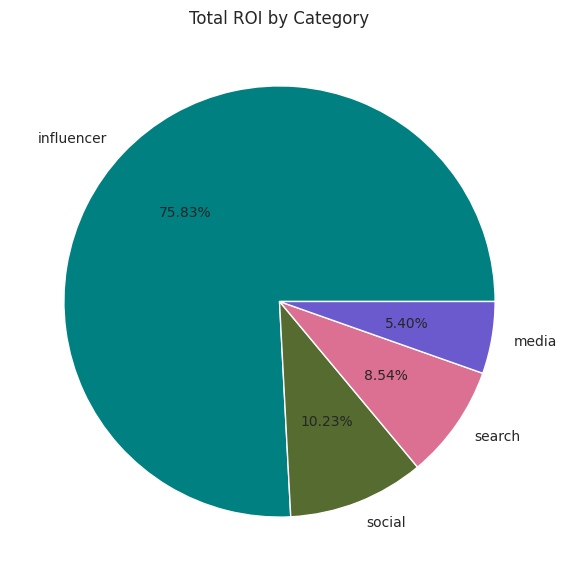

In [22]:
df["ROI"] = ((df["revenue"] - df["mark_spent"]) / df["mark_spent"]) * 100

# Sum ROI by category for pie chart
roi_by_category = df.groupby("category")[["ROI"]].sum().sort_values(by="ROI", ascending=False)

# Colors for the pie
colors = ['teal', 'darkolivegreen', 'palevioletred', 'slateblue']

# Plot pie chart
plt.figure(figsize=(7,7))
plt.pie(
    x=roi_by_category["ROI"], 
    labels=roi_by_category.index, 
    autopct="%.2f%%", 
    colors=colors
)
plt.title("Total ROI by Category")
plt.show()

*The influencer category includes some campaigns with relatively high ROI indicating strong potential when the right creators and audiences are selected.
The social and search categories exhibit mixed performance while some campaigns are profitable, others generate negative ROI 

# Performance of the campaign depending on the date

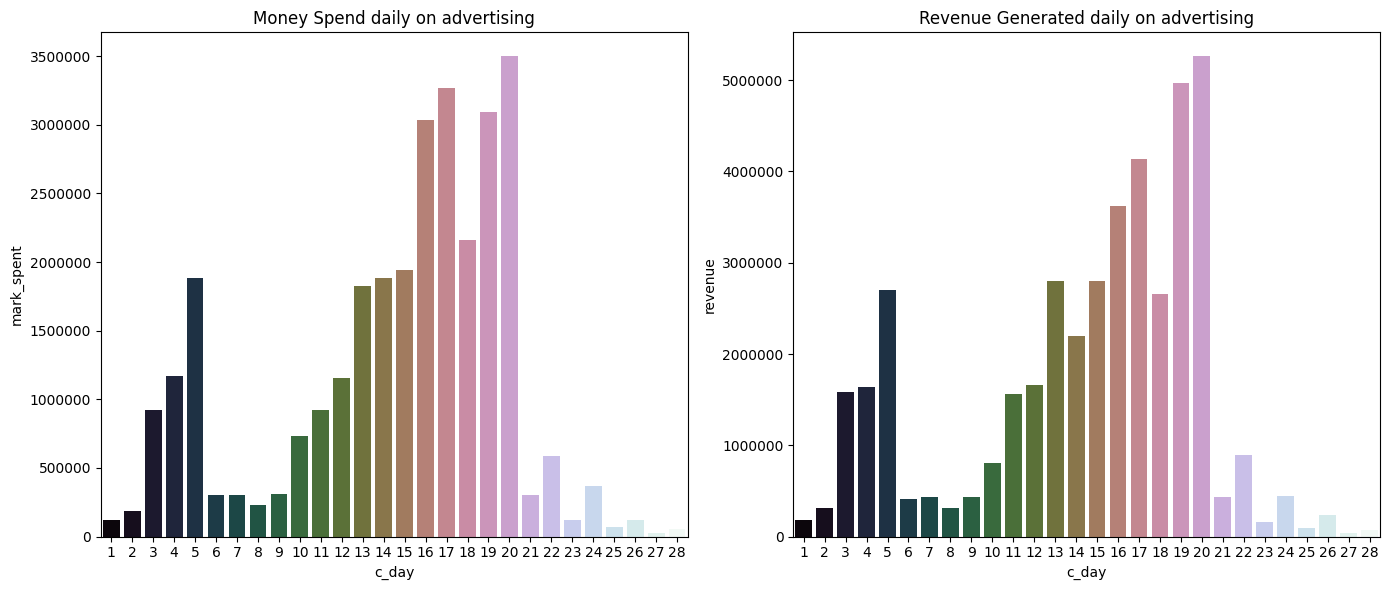

In [21]:
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
daily_spent = df.groupby('c_day')['mark_spent'].sum().reset_index()
sns.barplot(x='c_day', y='mark_spent', data=daily_spent, palette='cubehelix')
plt.ticklabel_format(style='plain', axis='y')
plt.title("Money Spend daily on advertising")

plt.subplot(1,2,2)
daily_revenue = df.groupby('c_day')['revenue'].sum().reset_index()
sns.barplot(x='c_day', y='revenue', data=daily_revenue, palette='cubehelix')
plt.ticklabel_format(style='plain', axis='y')
plt.title("Revenue Generated daily on advertising")

plt.tight_layout()
plt.show()

# Revenue Based on Conversion Rate

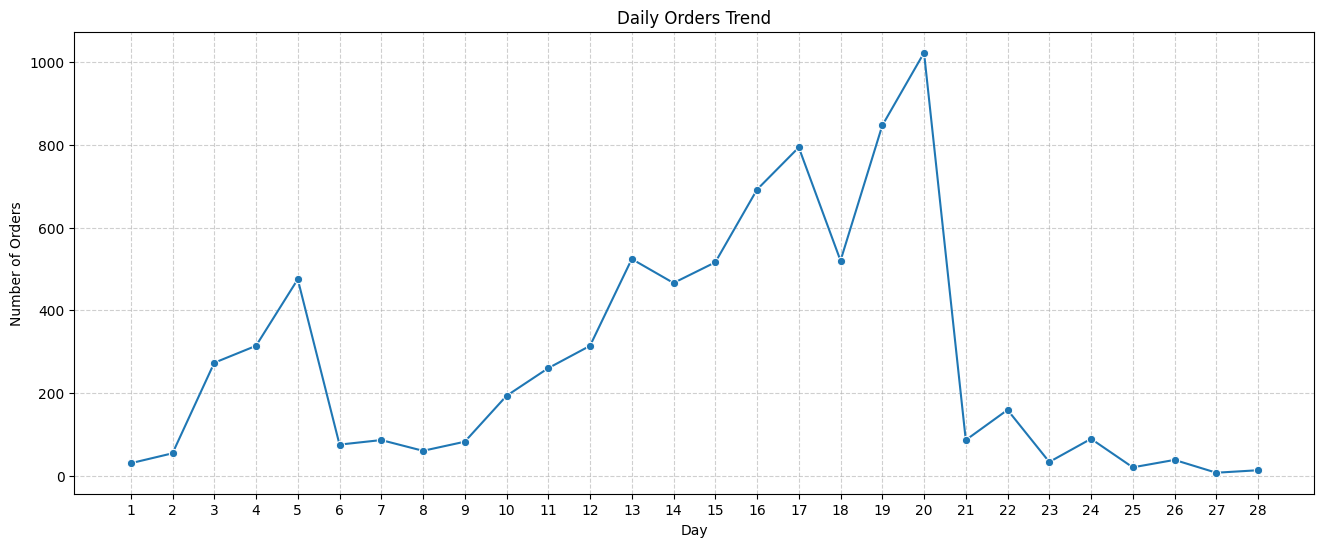

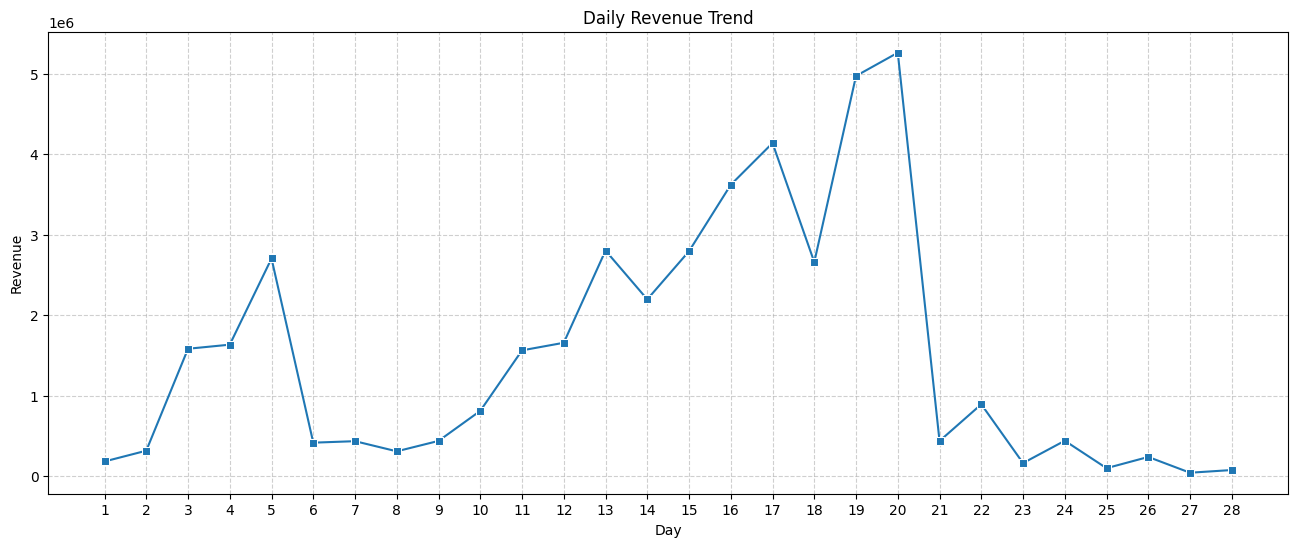

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Aggregate per day
daily_orders = df.groupby("c_day")["orders"].sum()
daily_revenue = df.groupby("c_day")["revenue"].sum()
plt.figure(figsize=(16,6))
sns.lineplot(
    x=daily_orders.index,
    y=daily_orders.values,
    marker='o'
)
plt.xlabel("Day")
plt.ylabel("Number of Orders")
plt.title("Daily Orders Trend")
plt.xticks(daily_orders.index)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()
plt.figure(figsize=(16,6))
sns.lineplot(
    x=daily_revenue.index,
    y=daily_revenue.values,
    marker='s'
)
plt.xlabel("Day")
plt.ylabel("Revenue")
plt.title("Daily Revenue Trend")
plt.xticks(daily_revenue.index)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


In [ ]:
crosstab_analyse1 = pd.crosstab(index=df['category'], columns=df['c_day'], values=df['leads'], aggfunc='sum')
crosstab_analyse1

# When buyers are more active?

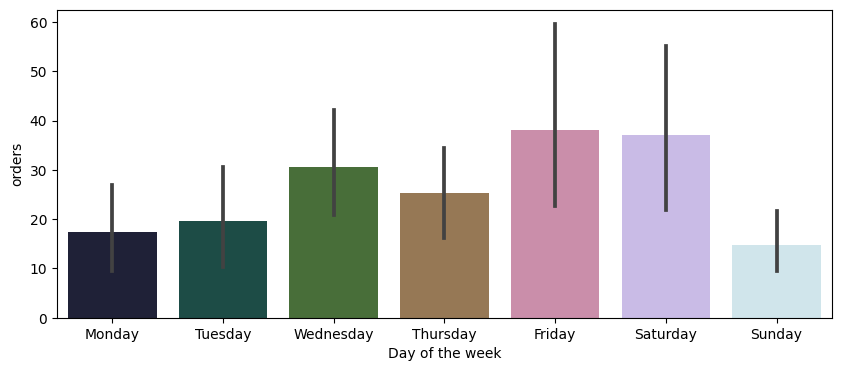

In [24]:
df['day_of_week'] = df["c_date"].dt.weekday
df['dayname_of_week'] = df["c_date"].dt.day_name()

plt.figure(figsize=(10,4))
sns.barplot(x=df['dayname_of_week'], y=df['orders'], palette='cubehelix')
plt.xlabel("Day of the week")
plt.show()

# What is the average revenue on weekdays and weekends?

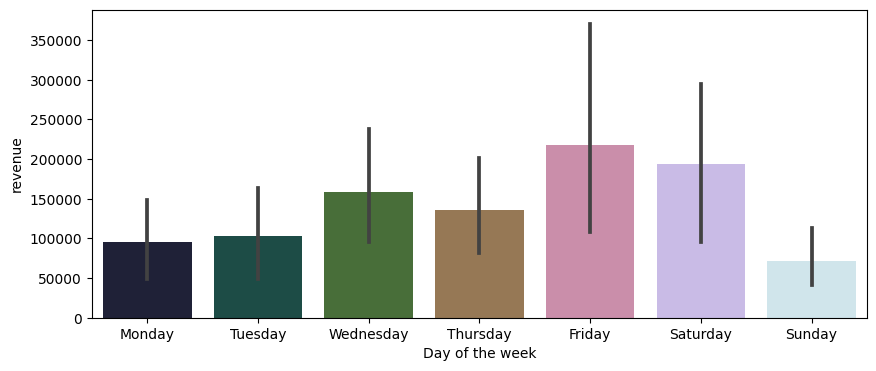

In [25]:
plt.figure(figsize=(10,4))
sns.barplot(data=df, x="dayname_of_week", y=df["revenue"], estimator="mean", palette='cubehelix')
plt.xlabel("Day of the week")
plt.show()

# Which types of campaigns work best - social, banner, influencer, or a search?

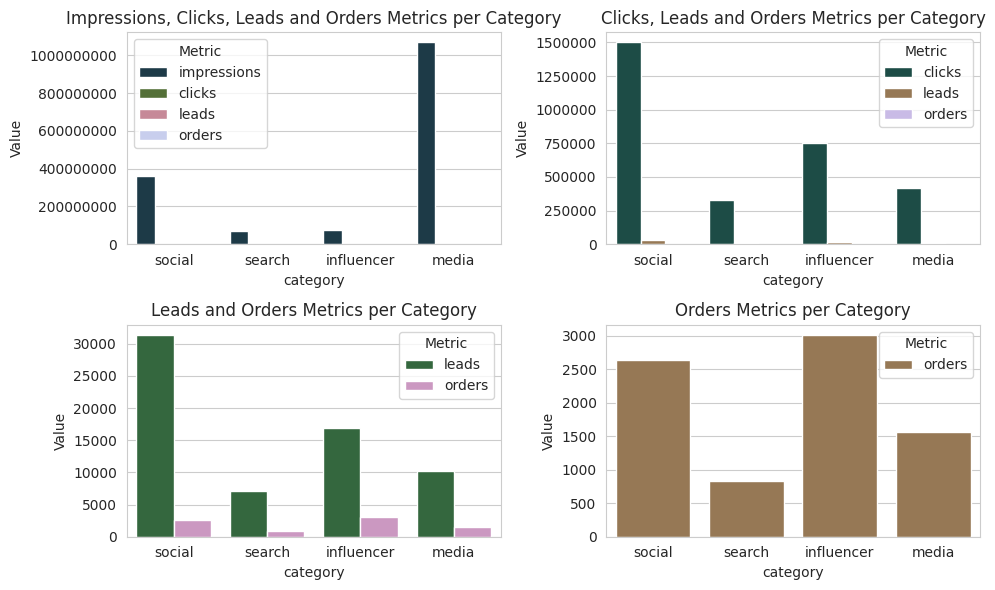

In [18]:
metrics1 = ["impressions", "clicks", "leads", "orders"]
metrics2 = ["clicks", "leads", "orders"]
metrics3 = ["leads", "orders"]
metrics4 = ["orders"]
df_melt1 = df.melt(id_vars="category", value_vars=metrics1, var_name="Metric", value_name="Value")
df_melt2 = df.melt(id_vars="category", value_vars=metrics2, var_name="Metric", value_name="Value")
df_melt3 = df.melt(id_vars="category", value_vars=metrics3, var_name="Metric", value_name="Value")
df_melt4 = df.melt(id_vars="category", value_vars=metrics4, var_name="Metric", value_name="Value")

plt.figure(figsize=(10,6))
plt.subplot(2,2,1)
sns.barplot(data=df_melt1, x="category", y="Value", hue="Metric", estimator="sum", ci=None, palette='cubehelix')
plt.title("Impressions, Clicks, Leads and Orders Metrics per Category")
plt.legend(title="Metric")
plt.ticklabel_format(style='plain', axis='y')

plt.subplot(2,2,2)
sns.barplot(data=df_melt2, x="category", y="Value", hue="Metric", estimator="sum", ci=None, palette='cubehelix')
plt.title("Clicks, Leads and Orders Metrics per Category")
plt.legend(title="Metric")
plt.ticklabel_format(style='plain', axis='y')


plt.subplot(2,2,3)
sns.barplot(data=df_melt3, x="category", y="Value", hue="Metric", estimator="sum", ci=None, palette='cubehelix')
plt.title("Leads and Orders Metrics per Category")
plt.legend(title="Metric")
plt.ticklabel_format(style='plain', axis='y')


plt.subplot(2,2,4)
sns.barplot(data=df_melt4, x="category", y="Value", hue="Metric", estimator="sum", ci=None, palette='cubehelix')
plt.title("Orders Metrics per Category")
plt.legend(title="Metric")
plt.ticklabel_format(style='plain', axis='y')


plt.tight_layout()
plt.show()

# Recommendations

**Customer Acquisition Cost (CAC):** Lowest  influencer campaigns and highest in social and search

**Cost per Click (CPC):** Highest in media campaigns.

**Cost per Lead (CPL):** highest for media and influencer

### . Revenue & Orders
  ** Revenue** highest in influencer and social compaignes.
  **Average Order Value (AOV):**  highest in influencer compaigns and social.
  **ROMI** is highest for infleuncer and social
  Conversion Rates * **CR1 :** Influencers get more clicks 
  * **CR2 :** influencer  and Social campaigns turn more clicks into real leads. 
Category Performance * **Social & Influencer:** Bring attention and leads . * **Media (Banner/YouTube):** Give low returns with cost more and stable conversions. * **Search:** Gives steady but smaller results. 

### . Suggestions 
Put more money into **influencer ** campaigns, optimise cost in  **media** and  social also test new ideas in Search campaigns 
to improve them. 
Target campaigns on weekends and Tuesdays to get more orders reduce cost per acquisition.